In [184]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import pathlib
from PIL import Image
%matplotlib notebook

In [200]:
def read_image(path):
    return np.array(Image.open(path))

def crop(img, bg_delta=5):
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img_width, img_height = gray.shape
    
    # Apply blur to image
    blur = cv2.blur(gray, (7,7))
    
    # Sample top left corner
    bg_sample = blur[0:100, 0:100]
    bg_sample_mn = np.mean(bg_sample)
    bg_sample_std = np.std(bg_sample)
    
    # Set background to zero
    mask = blur > bg_sample_mn + bg_delta
    
    horizontal_lines = np.argwhere(np.sum(mask, axis=0) > 100)
    vertical_lines = np.argwhere(np.sum(mask, axis=1) > 100)
    top, bottom = min(horizontal_lines), max(horizontal_lines)
    left, right = min(vertical_lines), max(vertical_lines)
    
    top, bottom, left, right = map(int, (top, bottom, left, right))
    
    mask[left:right, top:bottom] = True
            
    return img[left:right, top:bottom, :], mask

def save_image(array, filename):
    image = Image.fromarray(array, 'RGB')
    image.save(filename)
    
def process(path):
    
    # Convert path string to Path object
    fp = pathlib.Path(path)
    
    # Read image file into numpy array
    img = read_image(fp)
    
    # Apply cropping algorithm to image
    img_crop, _ = crop(img)
    
    # Save image crop to file
    save_image(img_crop, f"{fp.stem}.jpg")

    
for path in glob.glob("images/*.tif"):
    process(path)

<IPython.core.display.Javascript object>


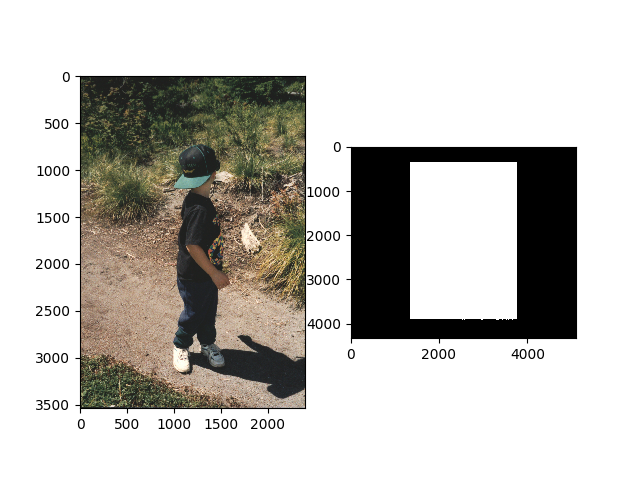

interactive(children=(IntSlider(value=0, description='x', max=8), Output()), _dom_classes=('widget-interact',)…

In [204]:
images = [crop(read_image(path)) for path in glob.glob("images/*.tif")]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
@interact(x=IntSlider(min=0, max=len(images)-1, step=1))
def plot_image(x):
    ax1.imshow(images[x][0])
    ax2.imshow(images[x][1], cmap="gray")